In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('uber.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17848 entries, 0 to 17847
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17848 non-null  int64  
 1   key                17848 non-null  object 
 2   fare_amount        17847 non-null  float64
 3   pickup_datetime    17847 non-null  object 
 4   pickup_longitude   17847 non-null  float64
 5   pickup_latitude    17847 non-null  float64
 6   dropoff_longitude  17847 non-null  float64
 7   dropoff_latitude   17847 non-null  float64
 8   passenger_count    17847 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.784800e+04,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000
mean,2.765310e+07,11.417429,-72.595005,39.951854,-72.580938,39.952298,1.672830
std,1.599173e+07,10.173691,11.458450,6.095753,10.197475,6.096021,1.295875
min,4.800000e+01,2.500000,-748.016667,-74.009697,-75.350437,-74.008745,0.000000
25%,1.383501e+07,6.000000,-73.992000,40.734977,-73.991591,40.733933,1.000000
50%,2.755475e+07,8.500000,-73.981823,40.752377,-73.980073,40.752884,1.000000
75%,4.140304e+07,12.500000,-73.967328,40.767152,-73.963307,40.768318,2.000000
max,5.542169e+07,350.000000,40.770667,41.366138,40.828377,41.366138,6.000000


In [ ]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [ ]:
df.isna().sum()

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [ ]:
df= df.assign(
    second = df.pickup_datetime.dt.second,
    minute = df.pickup_datetime.dt.minute,
    hour = df.pickup_datetime.dt.hour,
    day= df.pickup_datetime.dt.day,
    month = df.pickup_datetime.dt.month,
    year = df.pickup_datetime.dt.year,
    dayofweek = df.pickup_datetime.dt.dayofweek
)
df = df.drop('pickup_datetime',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17847 entries, 0 to 17846
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        17847 non-null  float64
 1   pickup_longitude   17847 non-null  float64
 2   pickup_latitude    17847 non-null  float64
 3   dropoff_longitude  17847 non-null  float64
 4   dropoff_latitude   17847 non-null  float64
 5   passenger_count    17847 non-null  float64
 6   second             17847 non-null  int64  
 7   minute             17847 non-null  int64  
 8   hour               17847 non-null  int64  
 9   day                17847 non-null  int64  
 10  month              17847 non-null  int64  
 11  year               17847 non-null  int64  
 12  dayofweek          17847 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 1.9 MB


In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3


In [ ]:
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
    (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
]

df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [ ]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    # long1,lati1,long2,lati2 = longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]
    # c = sqrt((long2 - long1) ** 2 + (lati2 - lati1) ** 2)asin 
       
    return c

In [ ]:
df['Distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)

Text(0, 0.5, 'fare_amount')

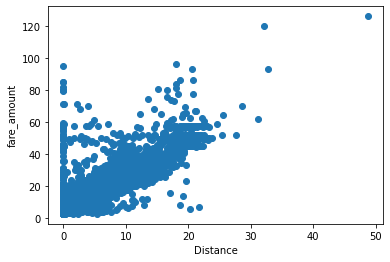

In [ ]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")


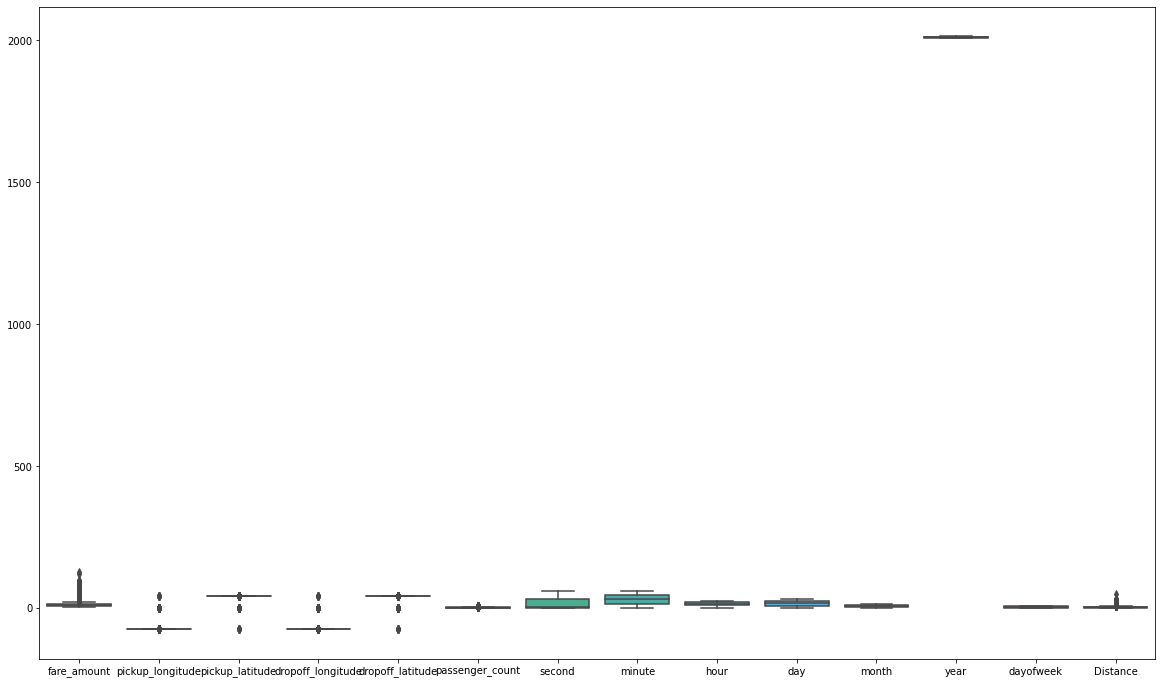

In [ ]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

Text(0, 0.5, 'fare_amount')

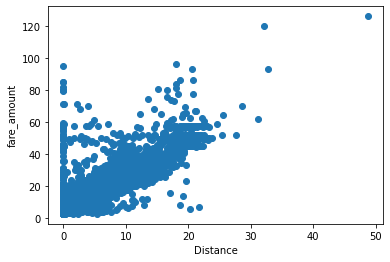

In [ ]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)

df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [ ]:

corr = df.corr()

corr.style.background_gradient()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
fare_amount,1.000000,0.011058,-0.010620,0.010744,-0.010569,0.008514,-0.006353,-0.007230,-0.003587,-0.001046,0.029099,0.124357,0.011921,0.855590
pickup_longitude,0.011058,1.000000,-0.978635,0.999992,-0.978618,0.005076,-0.018881,0.011759,-0.003357,0.007920,-0.014126,0.002281,-0.016376,-0.111318
pickup_latitude,-0.010620,-0.978635,1.000000,-0.978642,0.999987,-0.009071,0.021698,-0.011255,0.007316,-0.012252,0.014966,-0.005746,0.012885,0.101323
dropoff_longitude,0.010744,0.999992,-0.978642,1.000000,-0.978626,0.005062,-0.018794,0.011740,-0.003647,0.007937,-0.014099,0.002297,-0.016308,-0.111493
dropoff_latitude,-0.010569,-0.978618,0.999987,-0.978626,1.000000,-0.009051,0.021692,-0.011182,0.007265,-0.012254,0.014957,-0.005712,0.012914,0.101562
passenger_count,0.008514,0.005076,-0.009071,0.005062,-0.009051,1.000000,-0.217071,0.012622,0.013671,0.007715,0.011920,0.003301,0.030506,0.014155
second,-0.006353,-0.018881,0.021698,-0.018794,0.021692,-0.217071,1.000000,-0.011483,-0.009642,-0.001793,-0.055334,0.079914,0.002239,-0.006970
minute,-0.007230,0.011759,-0.011255,0.011740,-0.011182,0.012622,-0.011483,1.000000,0.007675,-0.001824,-0.002231,-0.004216,-0.015007,-0.014099
hour,-0.003587,-0.003357,0.007316,-0.003647,0.007265,0.013671,-0.009642,0.007675,1.000000,0.001317,0.001313,0.001086,-0.094099,-0.016315
day,-0.001046,0.007920,-0.012252,0.007937,-0.012254,0.007715,-0.001793,-0.001824,0.001317,1.000000,-0.021688,-0.014225,-0.003724,-0.000471


In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,0,47,17,28,8,2014,3,4.475450


In [ ]:
X = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.38506565]
 [-0.36540655]
 [ 0.14573003]
 ...
 [ 1.48254877]
 [-0.64063394]
 [-0.04103142]]
[[-0.0486786 ]
 [-0.0465598 ]
 [-0.03950288]
 ...
 [-0.02763267]
 [-0.0485187 ]
 [-0.05068712]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result.sample(10)

,Actual,Predicted
1035,2.219765,0.007167
466,-0.601316,0.006623
2920,-0.041031,0.006549
1516,0.352151,0.006686
212,0.303003,0.006679
141,-0.247452,0.006682
1978,0.027775,0.006707
1471,0.204707,0.006746
701,0.420957,0.006732
986,-0.729100,0.006572


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.587363268938521


ValueError: ignored

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=10)

In [ ]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

result.sample(10)

,Actual,Predicted
433,-0.758589,-0.594383
3463,-0.630804,-0.551244
1102,-0.581657,-0.581666
2622,-0.434213,-0.016675
2465,-0.797907,-0.586031
3249,-0.640634,-0.697868
2881,-0.719270,-0.747481
2750,-0.630804,-0.472975
2838,-0.601316,-0.404626
1809,-0.365407,-0.170290


In [ ]:
print('Mean Absolute Error:', metrics.s(y_pred= y_pred_RF,y_true=y_test))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

ValueError: ignored